In [ ]:
from google.colab import drive 
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
fichier_path=r'/content/drive/My Drive/data/employes.xlsx'


In [ ]:
import pandas as pd

In [ ]:
pd.read_excel(fichier_path)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,nom,salaire,age,anciennete
2,NaN,NaN,NaN,NaN,salim,600,24,2
3,NaN,NaN,NaN,NaN,sonia,650,28,3
4,NaN,NaN,NaN,NaN,salma,700,25,4
5,NaN,NaN,NaN,NaN,raja,600,35,8
6,NaN,NaN,NaN,NaN,ramla,650,36,9
7,NaN,NaN,NaN,NaN,raed,700,38,8
8,NaN,NaN,NaN,NaN,mondher,1500,24,2
9,NaN,NaN,NaN,NaN,mounir,1550,28,4


In [ ]:
df_empl_2008=pd.read_excel(fichier_path  ,
    sheet_name='2018' ,
              header=2,
              usecols=['nom' , 'salaire' , 'age' ,'anciennete'] ,
              index_col=0)

In [ ]:
df_empl_2008.head()

,salaire,age,anciennete
nom,,,
salim,600,24,2
sonia,650,28,3
salma,700,25,4
raja,600,35,8
ramla,650,36,9


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
ss.fit(df_empl_2008)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
X0=ss.transform(df_empl_2008)


In [ ]:
import numpy as np

In [ ]:
np.cov(X0.T, ddof=0)

array([[ 1.        , -0.43737373, -0.46351143],
       [-0.43737373,  1.        ,  0.95588463],
       [-0.46351143,  0.95588463,  1.        ]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(X0)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X1=pca.transform(X0)

In [ ]:
np.cov(X1.T, ddof=0)

array([[ 2.27435594e+00, -2.61549901e-16],
       [-2.61549901e-16,  6.81987732e-01]])

In [ ]:
import matplotlib.pyplot as plt


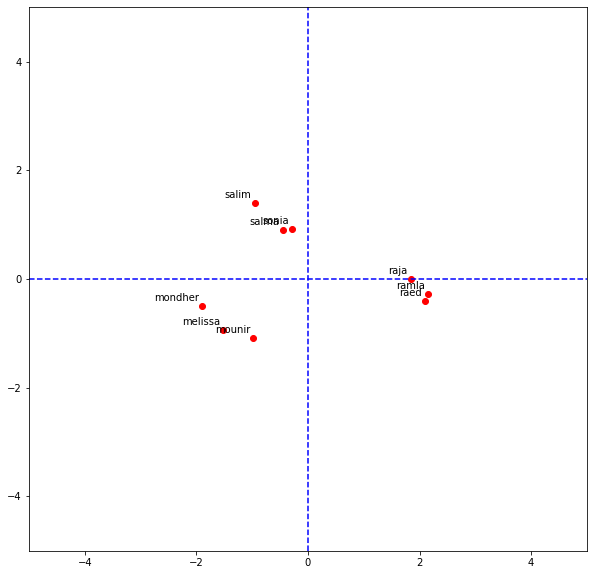

In [ ]:
plt.figure(figsize=(10,10))
plt.plot([-5,5],[0,0],'b--')
plt.plot([0,0],[-5,5],'b--')

plt.scatter(X1[:,0],X1[:,1],color='red')
for nom , x, y in zip(df_empl_2008.index, X1[:,0],X1[:,1]):
  plt.annotate(nom, xy=(x,y),
               textcoords='offset points',
               ha='right',va='bottom',
               xytext=(-3,3))

plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()